---
# <span style="color:pink">DS3000A - DS9000A Midterm Exam</span>

## <span style="color:pink">Student ID #: _________</span>

## <span style="color:pink">Grade: __ / 100</span>

## <span style="color:pink">General Comments</span>

- This exam integrates knowledge and skills acquired in the first half of the term.

- Use of AI agents such as ChatGPT and Copilot is considered an act of cheating and you will receive 0 mark for the exam.

- You are allowed to use any other resources on your computer or the internet, but you are **not** allowed to share documents, post questions to forums such as Stack Overflow (this includes use of homework helpers such as Chegg), or communicate in anyway with people inside or outside the exam room.

- Having any communication tools (*e.g.*, Discord, Teams, Slack, Outlook etc.) either web-based or app-based open on your computer (or having them running in the background) is considered an act of cheating and you will receive 0 mark for the exam.

- To finish the midterm in the alloted time, you will have to work efficiently.

- Please read the entirety of each question carefully.

- You must have your work submitted by 5:30PM to the "Test and Quizzes" section of the course's site on OWL, *i.e.*, the same place where you originally downloaded the notebook. Late submissions will be scored with 0 mark unless one has an approved accommodation for submitting late. Therefore, to avoid technical difficulties at the time of submission, please initiate your submission process at the latest five minutes before the deadline.

- Some questions demand a **written answer**. Please answer these in full English sentences in a markdown cell right underneath the question.

- For your figures ensure that all axes are labeled in an informative way. To facilitate interpretation, there could be a situation where you should limit the x-axis and/or y-axis to zoom-in.

- At the end, before submitting to OWL, restart the kernel and rerun all cells to make sure that your notebook runs error free and as expected.

## <span style="color:pink">Additional Guidance</span>

- The toolbox cells offer almost every tool that you need to answer the questions, however, depending on your answers, there could be a couple of instances where you'd need to bring in more tools - unless a question imposes certain restrictions.

- If at any point you are asking yourself "are we supposed to...", write your assumptions clearly and proceed according to them.

- If you have no clue how to approach a question, skip it, and move on. Revisit the skipped one(s) after you are done with other questions.

- Where applicable, take advantage of the argument `n_jobs=-1` to speed up processes with parallel computing.

- To navigate within the notebook, better to take advantage of the notebook's table of contents (normally on the left side of the screen). It saves you time compared to pure mouse scrolling. In VScode, it is nested under the "OUTLINE" tab which is by default minimized unless you click it to maximize.

- Please ensure that your results are generated using the provided random seed, where applicable.

---
## <span style="color:orange">Global Toolbox</span>

In [ ]:
import warnings; warnings.filterwarnings('ignore')
import pandas as pd; pd.set_option('display.max_columns', None)
import numpy as np; seed = 202311; np.random.seed(seed)
import matplotlib.pyplot as plt
import sklearn as sk
from IPython.display import display
%matplotlib inline

---
## Question 1 - <span style="color:red">[100]</span> - Regression
The data set `Midterm_dataset.csv` , lists salaries of job roles in data profession and has the following attributes:

|Index | Attribute | Description |
| --- | --- | --- |
|0|`exp`|Experience level in the job during the year. In ascending order: EN (entry), MI (mid), SE (senior), EX (executive). Thus, EN refers to no experience and EX to highest level of experience.|
|1|`emp_title`|The role the employee worked in during the year.|
|2|`compensation`|Salary in USD.|
|3|`perc_remote`|Percentage of work done remotely.|
|4|`co_size`|The size of the employer company. S for small, M for medium, and L for large.|
|5|`co_location`|The country of the employer's main office.|
|6|`year`|The year compensation was paid.|
|7|`emp_location`|Location of employee's residence during the work year in the format of (latitude,longitude).|
|8|`emp_ID`|Employee's identification number at the company.|

### <span style="color:orange">Q1 Toolbox</span>

In [ ]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold

### Q1.1 - <span style="color:red">[16]</span> - Load the dataset and answer the following questions:

1. Are there any `nan` and duplicate rows in the dataframe? <span style="color:green">[4]</span>
2. What percentage of the data pertains to employees who worked entirely in-person? <span style="color:green">[4]</span>
3. Taking 3% as the threshold for statistical significance, what countries (*i.e.*, employer's location) are statistically significant in the data?<span style="color:green">[4]</span>
4. Delete from the dataset the rows belonging to insignificant countries and display the last five rows of this new dataset. **From now on, you will be working with this new dataset.** <span style="color:green">[4]</span>

In [ ]:
datafile = 'Midterm_dataset.csv'

df = pd.read_csv(datafile)

display(df.info(null_counts=True))

print(f"Duplicates: {df.duplicated().any()}")

print(f'Question 1: There is a couple of missing values, but no duplicate row.')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2476 entries, 0 to 2475
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   exp           2476 non-null   object 
 1   emp_title     2476 non-null   object 
 2   compensation  2475 non-null   object 
 3   perc_remote   2475 non-null   float64
 4   co_size       2476 non-null   object 
 5   co_location   2476 non-null   object 
 6   year          2476 non-null   int64  
 7   emp_location  2476 non-null   object 
 8   emp_ID        2476 non-null   int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 174.2+ KB


None

Duplicates: False
Question 1: There is a couple of missing values, but no duplicate row.


In [ ]:
df = df.dropna().reset_index(drop=True)

print(f'\nQuestion 2: {np.round(len(df.loc[(df["perc_remote"]==0)])*100/len(df),2)}% of the data pertains to in-person employees.')

threshold = 3/100
countries = (df['co_location'].value_counts(sort=True, ascending=False) / len(df)) >= threshold
countries = [x for x in countries[countries == True].index.values]
print(f'\nQuestion 3: Only {countries} are statistically significant in the data.')

df = df[df['co_location'].isin(countries)].reset_index(drop=True)

print('\nQuestion 4: The last 5 rows of the reduced dataset are:')
display(df.tail())


Question 2: 47.21% of the data pertains to in-person employees.

Question 3: Only ['United States', 'United Kingdom', 'Canada'] are statistically significant in the data.

Question 4: The last 5 rows of the reduced dataset are:


,exp,emp_title,compensation,perc_remote,co_size,co_location,year,emp_location,emp_ID
2108,MI,Data Analyst,62000,0.0,L,United States,2021,"(37.09024, -95.712891)",57402
2109,MI,Data Scientist,73000,0.0,L,United States,2021,"(37.09024, -95.712891)",75206
2110,MI,Applied Machine Learning Scientist,USD423000,50.0,L,United States,2021,"(37.09024, -95.712891)",67584
2111,SE,Data Specialist,165000,100.0,L,United States,2021,"(37.09024, -95.712891)",15877
2112,MI,Principal Data Scientist,151000,100.0,L,United States,2021,"(37.09024, -95.712891)",87202


### Q1.2 - <span style="color:red">[11]</span> - Use box plots to visualize the distributions of salaries based on levels of job experience. Level the box plots on country, so you can see the distributions for each country separately <span style="color:green">[5]</span>. Answer the following questions solely by relying on your interpretation of the box plots:
1. Which country pays higher salaries across all experience levels? <span style="color:green">[3]</span>
2. Within which class of experience level the salaries paid by the countries are most similar? How much job experience people in this class have? <span style="color:green">[3]</span>

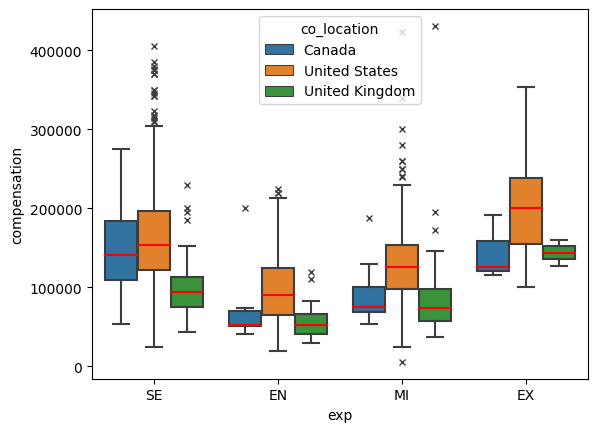


Question 1: United States pays higher salaries across all experience levels.

Question 2: Experience level EN. According to the data dictionary, this code pertains to people with zero experience.


In [ ]:
df['compensation'] = df['compensation'].str.extract(r'(\d+)').astype(int)

sns.boxplot(df, y="compensation", x="exp", hue="co_location", notch=False, flierprops={"marker": "x"}, medianprops={"color": "red"})
plt.show()

print('\nQuestion 1: United States pays higher salaries across all experience levels.')

print('\nQuestion 2: Experience level EN. According to the data dictionary, this code pertains to people with zero experience.')

### Q1.3 - <span style="color:red">[18]</span> - Eventually, we want to train a regularized regression model to predict salary. With this in mind, for this question, prepare the data for that stage. For the preparation phase, you should use applicable techniques and knowledge covered during the term, but ignore statistical significance of categorical attributes, also, ignore studying pairwise relationships between attributes and/or target. Once you are done with all your preprocessings, split the data into training and test sets with a test set size of 20%.

In [ ]:
display(df)
display(df.info())

,exp,emp_title,compensation,perc_remote,co_size,co_location,year,emp_location,emp_ID
0,SE,Data Scientist,175000,100.0,M,Canada,2023,"(56.130366, -106.346771)",63218
1,SE,Data Scientist,120000,100.0,M,Canada,2023,"(56.130366, -106.346771)",49089
2,SE,Applied Scientist,222200,0.0,L,United States,2023,"(37.09024, -95.712891)",77867
3,SE,Applied Scientist,136000,0.0,L,United States,2023,"(37.09024, -95.712891)",84425
4,SE,Data Scientist,219000,0.0,M,Canada,2023,"(56.130366, -106.346771)",44180
...,...,...,...,...,...,...,...,...,...
2108,MI,Data Analyst,62000,0.0,L,United States,2021,"(37.09024, -95.712891)",57402
2109,MI,Data Scientist,73000,0.0,L,United States,2021,"(37.09024, -95.712891)",75206
2110,MI,Applied Machine Learning Scientist,423000,50.0,L,United States,2021,"(37.09024, -95.712891)",67584
2111,SE,Data Specialist,165000,100.0,L,United States,2021,"(37.09024, -95.712891)",15877


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2113 entries, 0 to 2112
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   exp           2113 non-null   object 
 1   emp_title     2113 non-null   object 
 2   compensation  2113 non-null   int64  
 3   perc_remote   2113 non-null   float64
 4   co_size       2113 non-null   object 
 5   co_location   2113 non-null   object 
 6   year          2113 non-null   int64  
 7   emp_location  2113 non-null   object 
 8   emp_ID        2113 non-null   int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 148.7+ KB


None

In [ ]:
# Observations to be made:
## `emp-ID` has no statistical meaning and to be dropped
## `exp` to be encoded in an ordinal way
## `co_size` to be encoded in an ordinal way
## `emp_location` to be splitted into two separate columns: one for latitude and one for longitude
## `co_location` to be encoded in a one-hot way
## `emp_title` to be encoded in a one-hot way
## Dropping rows with a NaN, if not done in Q1.1

##### 2 pts
df.drop("emp_ID", axis=1, inplace=True)

##### 3 pts
df['exp'] = df['exp'].replace(['EN', 'MI', 'SE', 'EX'], [0, 1, 2, 3])

##### 3 pts
df['co_size'] = df['co_size'].replace(['S', 'M', 'L'], [1, 2, 3])

##### 6 pts
def str_to_tuple(string):
    string = string.strip("()")      # Remove the parentheses
    string_list = string.split(', ') # Split the string into a list
    float_tuple = (float(string_list[0]), float(string_list[1])) # Convert the substrings to float and create a tuple
    return float_tuple
df['emp_location'] = df["emp_location"].apply(lambda x: str_to_tuple(x))
df[["latitude","longitude"]] = df["emp_location"].apply(lambda x: pd.Series(x))
df.drop("emp_location", axis=1, inplace=True)
# or
# df[["latitude", "longitude"]] = df["emp_location"].str.strip('()').str.split(',', expand=True)
# df.drop("emp_location", axis=1, inplace=True)

##### 2 pts
df = pd.get_dummies(df, drop_first=True)

##### 2 pts
X = df.drop(["compensation"], axis =1)
y = df["compensation"]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=seed)

### Q1.4 - <span style="color:red">[20]</span> - Train a regression model which uses the following loss function for training:
$$J(\beta)=MSE(\beta)+\lambda(r\sum_{i=1}^n |\beta_i|+\frac{1-r}{2}\sum_{i=1}^n\beta_i^2).$$

With $\lambda=2$, your model must use a 5-fold cross-validation to find the best value among $[0.1, 0.4, 0.8, 1]$ for the $l_1$ ratio. What is the best value for $l_1$ ratio that you find?

In [ ]:
# 5 pts for understanding that the given loss functions is Elastic
# 5 pts for using StandardScaler()
# 10 pts for the rest

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNetCV

reg = ElasticNetCV(l1_ratio=[0.1, 0.4, 0.8, 1], alphas=[2], cv=5, random_state=seed, n_jobs=-1, max_iter=10000)

model = Pipeline([('Scaler', StandardScaler()),
                  ('ElasticNet', reg)]
                  ).fit(Xtrain, ytrain)

print(model['ElasticNet'].l1_ratio_)

0.8


### Q1.5 - <span style="color:red">[15]</span> - Report the training and generalization RMSE of your model as well as the mean and standard deviation of its shuffled cross-validation RMSE over 5 folds. Comment on the performance of this model in the context of overfitting/underfitting.

In [ ]:
# 4 pts
from sklearn.metrics import mean_squared_error
Tr_RMSE = mean_squared_error(ytrain, model.predict(Xtrain), squared=False)
print('Training RMSE:', Tr_RMSE.round(3))

# 4 pts
Ge_RMSE = mean_squared_error(ytest, model.predict(Xtest), squared=False)
print('Generalization RMSE:', Ge_RMSE.round(3))

# 7 pts
from sklearn.model_selection import cross_val_score
kf = KFold(n_splits=5, shuffle=True, random_state=seed)
cv_scores = cross_val_score(model, Xtrain, ytrain, cv=kf, scoring='neg_root_mean_squared_error', n_jobs=-1)
print(f"Cross-validation RMSE: %.3f +/- %.3f" % (-cv_scores.mean(), cv_scores.std()))
# Doing it the following way won't be shuffled --> partial mark
# cv_scores = cross_val_score(model, Xtrain, ytrain, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
# print(f"Cross-validation RMSE: %.3f +/- %.3f" % (-cv_scores.mean(), cv_scores.std()))

Training RMSE: 48790.161
Generalization RMSE: 50568.782
Cross-validation RMSE: 51312.928 +/- 3636.627


### Q1.6 - <span style="color:red">[10]</span> - Plot a bar plot showing feature importance for your model for the top 10 attributes.

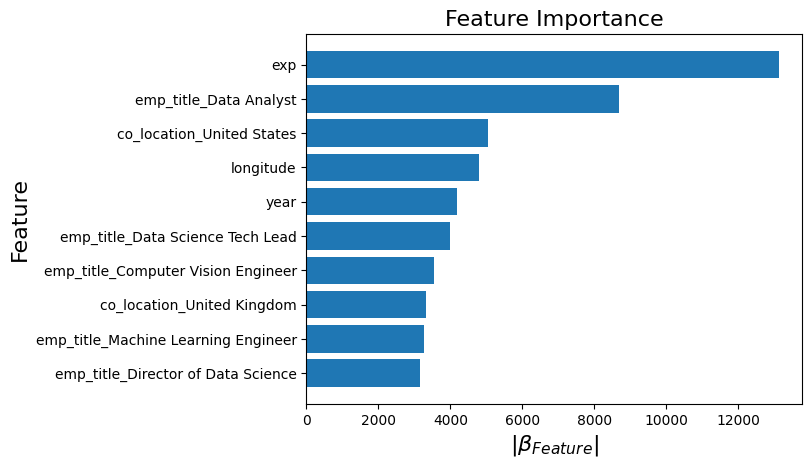

In [ ]:
importances = pd.DataFrame({'Feature': Xtrain.columns.values, '|Beta|': abs(model['ElasticNet'].coef_)}
                           ).sort_values(by='|Beta|', ascending=False)

topN = 10

plt.barh(importances['Feature'].values[:topN], importances['|Beta|'].values[:topN])
plt.title('Feature Importance', fontsize=16)
plt.xlabel(r'$|\beta_{Feature}|$', fontsize=16)
plt.ylabel('Feature', fontsize=16)
plt.gca().invert_yaxis()
plt.show()

### Q1.7 - <span style="color:red">[10]</span> - Calculate the confidence interval based on a confidence level of 95% for the mean of predictions by bootstrapping.

In [ ]:
def BootstrapPred(MODEL, X_train, y_train, X_test, numboot=100):
    y_pred = np.zeros(numboot)
    for i in range(numboot):
        X_fit = X_train.sample(Xtrain.shape[0], replace=True)
        y_fit = y_train[X_fit.index]
        y_pred[i]=MODEL.fit(X_fit, y_fit).predict(X_test).mean()
    return y_pred

yhat_s         = model.predict(Xtest)
mean_yhat_s    = yhat_s.mean()
mean_yhat_boot = BootstrapPred(model, Xtrain, ytrain, Xtest, 50)

# # numboot of 50 is too small. One could look at the boot distribution to see what value of numboot results
# # in a fairly normal distribution. However, for this exam, using a small value for numboot was fine given
# # the time constraints.
# bm = pd.DataFrame(data=BootstrapPred(model, Xtrain, ytrain, Xtest, 400)-mean_yhat_s, columns=['Values'])
# ax = bm.Values.plot(kind='hist', bins=20)
# bm.Values.plot(kind='kde', ax=ax, secondary_y=True)
# plt.show()

boot_CL = 95/100
p1 = (1-boot_CL)/2
p2 = 1-p1

boot_quant = np.quantile(mean_yhat_boot-mean_yhat_s, [p1, p2])

boot_ci = [(mean_yhat_s - boot_quant[1]).round(3),
           (mean_yhat_s - boot_quant[0]).round(3)]

print(f"Boot confidence interval is {boot_ci} in USD.")

Boot confidence interval is [145874.867, 151318.634] in USD.
